# 深层循环神经网络

:label:`sec_deep_rnn`

到目前为止，我们只讨论了一个单向隐藏层的RNN。其中，隐变量和观测值如何相互作用的具体函数形式是相当任意的。只要我们有足够的灵活性来建模不同类型的交互，这就不是一个大问题。然而，对于一个单隐藏层来说，这可能是相当具有挑战性的。在线性模型的情况下，我们通过添加更多的层来解决这个问题。在循环神经网络中，这有点棘手。因为我们首先需要决定如何以及在哪里添加额外的非线性函数。

事实上，我们可以将多层循环神经网络堆叠在一起。通过几个简单的层的组合，产生了一个灵活的机制。特别是，数据可能与堆叠的不同层级有关。例如，我们可能希望保持有关金融市场状况（熊市或牛市）的高级数据可用，而在较低级别，我们只记录较短期的时间动态。

除了以上所有的抽象讨论之外，通过 :numref:`fig_deep_rnn` 可能更容易理解我们感兴趣的模型。它描述了一个具有$L$个隐藏层的深层循环神经网络。每个隐藏状态都连续传递到当前层的下一个时间步和下一层的当前时间步。

![深层循环神经网络的结构。](../img/deep-rnn.svg)
:label:`fig_deep_rnn`

## 函数依赖关系

我们可以在 :numref:`fig_deep_rnn` 中描述的$L$个隐藏层的深层结构中的函数依赖关系形式化。我们下面的讨论主要集中在经典循环神经网络模型上，但它也适用于其他序列模型。

假设我们在时间步$t$有一个小批量输入$\mathbf{X}_t \in \mathbb{R}^{n \times d}$（样本数：$n$，每个样本中的输入数：$d$）。同时，将$l^\mathrm{th}$隐藏层（$l=1,\ldots,L$）的隐藏状态设为$\mathbf{H}_t^{(l)}  \in \mathbb{R}^{n \times h}$（隐藏单元数：$h$），输出层变量设为$\mathbf{O}_t \in \mathbb{R}^{n \times q}$（输出数：$q$）。设置$\mathbf{H}_t^{(0)} = \mathbf{X}_t$，使用激活函数$\phi_l$的第$l$个隐藏层的隐藏状态表示如下：

$$\mathbf{H}_t^{(l)} = \phi_l(\mathbf{H}_t^{(l-1)} \mathbf{W}_{xh}^{(l)} + \mathbf{H}_{t-1}^{(l)} \mathbf{W}_{hh}^{(l)}  + \mathbf{b}_h^{(l)}),$$
:eqlabel:`eq_deep_rnn_H`

其中，权重$\mathbf{W}_{xh}^{(l)} \in \mathbb{R}^{h \times h}$和$\mathbf{W}_{hh}^{(l)} \in \mathbb{R}^{h \times h}$以及偏置$\mathbf{b}_h^{(l)} \in \mathbb{R}^{1 \times h}$是第$l$个隐藏层的模型参数。

最后，输出层的计算仅基于最终第$l$个隐藏层的隐藏状态：

$$\mathbf{O}_t = \mathbf{H}_t^{(L)} \mathbf{W}_{hq} + \mathbf{b}_q,$$

其中，权重$\mathbf{W}_{hq} \in \mathbb{R}^{h \times q}$和偏置$\mathbf{b}_q \in \mathbb{R}^{1 \times q}$是输出层的模型参数。

与多层感知机一样，隐藏层的数目$L$和隐藏单元的数目$h$是超参数。换句话说，它们可以由我们调整或指定。另外，用门控循环单元或长短期记忆网络的隐藏状态计算代替 :eqref:`eq_deep_rnn_H` 的隐藏状态计算，可以很容易地得深层门控循环神经网络。

## 简洁实现

幸运的是，实现多层循环神经网络所需的许多细节在高级API中都是现成的。为了简单起见，我们仅说明使用此类内置函数的实现。让我们以长短期记忆网络模型为例。该代码与我们之前在 :numref:`sec_lstm` 中使用的代码非常相似。实际上，唯一的区别是我们显式地指定了层的数量，而不是单个层的默认值。像往常一样，我们从加载数据集开始。


In [1]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

选择超参数等结构决策与 :numref:`sec_lstm` 的决策非常相似。我们选择相同数量的输入和输出，因为我们有不同的标记，即`vocab_size`。隐藏单元的数量仍然是256。唯一的区别是，我们现在通过指定`num_layers`的值来指定隐藏层数。


In [2]:
vocab_size, num_hiddens, num_layers = len(vocab), 256, 2
num_inputs = vocab_size
device = d2l.try_gpu()
lstm_layer = nn.LSTM(num_inputs, num_hiddens, num_layers)
model = d2l.RNNModel(lstm_layer, len(vocab))
model = model.to(device)

## 训练与预测

因为现在我们用长短期记忆网络模型实例化了两个层，这个相当复杂的结构大大降低了训练速度。


perplexity 1.0, 196425.8 tokens/sec on cuda:0
time travelleryou can show black is white by argument said filby


travelleryou can show black is white by argument said filby


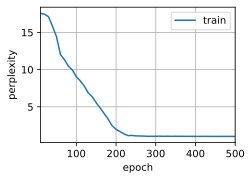

In [3]:
num_epochs, lr = 500, 2
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)

## 小结

* 在深层循环神经网络中，隐藏状态信息被传递到当前层的下一时间步和下一层的当前时间步。
* 有许多不同风格的深层循环神经网络，如长短期记忆网络、门控循环单元、或经典循环神经网络。这些模型在深度学习框架的高级API中都有涵盖。
* 总体而言，深层循环神经网络需要大量的工作(如学习率和修剪)来确保适当的收敛，模型的初始化也需要谨慎。

## 练习

1. 尝试使用我们在 :numref:`sec_rnn_scratch` 中讨论的单层实现两层循环神经网络的从零开始实现。
2. 用门控循环单元替换长短期记忆网络，比较精确度和训练速度。
3. 增加训练数据以包含多本书。你的困惑度能降到多低？
4. 在为文本建模时，是否要合并不同作者的来源？为什么这是个好主意？会出什么问题？


[Discussions](https://discuss.d2l.ai/t/2770)
